In [23]:
import pandas as pd
from matplotlib.figure import Figure

df = pd.read_csv("../src_data/removed_data_cross_dedup.csv")
df

runname  seed  steps  agg_score  \
0                deduped_removed_cross     5      0   0.330893   
1                deduped_removed_cross     5   1000   0.354090   
2                deduped_removed_cross     5   2000   0.373601   
3                deduped_removed_cross     5   3000   0.383122   
4                deduped_removed_cross     5   4000   0.390222   
5                deduped_removed_cross     5   5000   0.400239   
6                deduped_removed_cross     5   6000   0.401484   
7                deduped_removed_cross     5   7000   0.403533   
8                deduped_removed_cross     5   8000   0.411774   
9                deduped_removed_cross     5   9000   0.410993   
10               deduped_removed_cross     5  10000   0.417883   
11               deduped_removed_cross     5  11000   0.422325   
12               deduped_removed_cross     5  12000   0.420167   
13               deduped_removed_cross     5  13000   0.422913   
14               deduped_removed_cross     5  13500   0.421868   
15               deduped_removed_cross     6      0   0.330893   
16               deduped_removed_cross     6   1000   0.360039   
17               deduped_removed_cross     6   2000   0.371564   
18               deduped_removed_cross     6   3000   0.383770   
19               deduped_removed_cross     6   4000   0.391082   
20               deduped_removed_cross     6   5000   0.399130   
21               deduped_removed_cross     6   6000   0.402792   
22               deduped_removed_cross     6   7000   0.408846   
23               deduped_removed_cross     6   8000   0.411429   
24               deduped_removed_cross     6   9000   0.417279   
25               deduped_removed_cross     6  10000   0.421399   
26               deduped_removed_cross     6  11000   0.421204   
27               deduped_removed_cross     6  12000   0.421667   
28               deduped_removed_cross     6  13000   0.424979   
29               deduped_removed_cross     6  13500   0.425356   
30  cross_minhash_dump_CC-MAIN-2013-48     6      0   0.331018   
31  cross_minhash_dump_CC-MAIN-2013-48     6   1000   0.349494   
32  cross_minhash_dump_CC-MAIN-2013-48     6   2000   0.367893   
33  cross_minhash_dump_CC-MAIN-2013-48     6   3000   0.379114   
34  cross_minhash_dump_CC-MAIN-2013-48     6   4000   0.383025   
35  cross_minhash_dump_CC-MAIN-2013-48     6   5000   0.387223   
36  cross_minhash_dump_CC-MAIN-2013-48     6   6000   0.394011   
37  cross_minhash_dump_CC-MAIN-2013-48     6   7000   0.398090   
38  cross_minhash_dump_CC-MAIN-2013-48     6   8000   0.398513   
39  cross_minhash_dump_CC-MAIN-2013-48     6   9000   0.397494   
40  cross_minhash_dump_CC-MAIN-2013-48     6  10000   0.402640   
41  cross_minhash_dump_CC-MAIN-2013-48     6  11000   0.402599   
42  cross_minhash_dump_CC-MAIN-2013-48     6  12000   0.407442   
43  cross_minhash_dump_CC-MAIN-2013-48     6  13000   0.405577   
44  cross_minhash_dump_CC-MAIN-2013-48     6  13500   0.405000   

    commonsense_qa/acc  commonsense_qa/acc_norm  hellaswag/acc  \
0                0.186                    0.233          0.272   
1                0.253                    0.257          0.290   
2                0.274                    0.290          0.313   
3                0.306                    0.292          0.323   
4                0.300                    0.292          0.324   
5                0.322                    0.308          0.325   
6                0.315                    0.314          0.341   
7                0.324                    0.315          0.350   
8                0.344                    0.313          0.352   
9                0.335                    0.322          0.361   
10               0.330                    0.320          0.370   
11               0.332                    0.328          0.366   
12               0.348                    0.324          0.364   
13               0.346                    0.330          0.372   
14  

In [24]:
runs_mapping = {
    "deduped_removed_cross": "Originally removed data",
    "cross_minhash_dump_CC-MAIN-2013-48": "Originally kept data",
}

In [25]:
df.columns

Index(['runname', 'seed', 'steps', 'agg_score', 'commonsense_qa/acc',
       'commonsense_qa/acc_norm', 'hellaswag/acc', 'hellaswag/acc_norm',
       'openbookqa/acc', 'openbookqa/acc_norm', 'piqa/acc', 'piqa/acc_norm',
       'siqa/acc', 'siqa/acc_norm', 'winogrande/acc', 'winogrande/acc_norm',
       'sciq/acc', 'sciq/acc_norm', 'arc/acc', 'arc/acc_norm', 'mmlu/acc',
       'mmlu/acc_norm'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


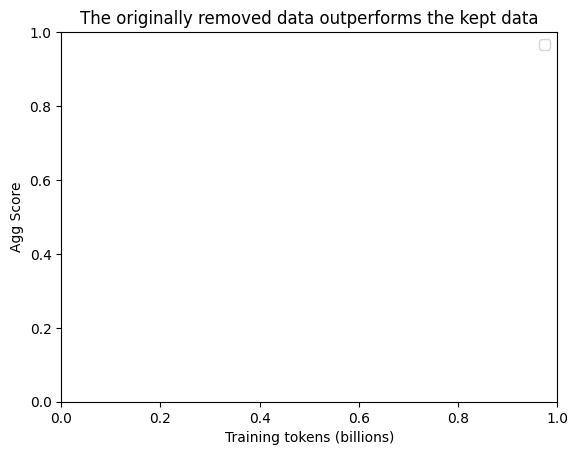

In [27]:
import json
import os
from matplotlib import pyplot as plt
metrics = ['agg_score', 'commonsense_qa/acc_norm', 'hellaswag/acc_norm', 'openbookqa/acc_norm', 'piqa/acc_norm',
                   'siqa/acc_norm', 'winogrande/acc_norm', 'arc/acc_norm', 'mmlu/acc_norm']

def normalize_runname(runname):
    return runname.replace("/", "_")

grouped = (
    df.groupby(["runname", "steps"])
    .agg(
        {
            key: "mean" for key in metrics
        }
    )
    .reset_index()
)

file_id="../assets/data/plots/removed_data_dedup"
files = {}
for metric in metrics:
    datas = {}
    for name, group in grouped.groupby("runname"):
        group = group[["steps", metric]].sort_values(by="steps")
        group = group.set_index("steps")
        rolling_avg = group
        # rolling_avg = group.rolling(window=5).mean()
        datas[name] = {
            "x": (rolling_avg.index * 2048 * 1024 * 1e-9).tolist(),
            "y": rolling_avg[metric].tolist(),
            "label": runs_mapping[name],
        }
    # Sort the datata based on the steps
    datas = {k: v for k, v in sorted(datas.items(), key=lambda x: -x[1]["y"][-1])}
    # Create a folder
    os.makedirs(f"{file_id}", exist_ok=True)
    with open(f"{file_id}/{normalize_runname(metric)}.json", "w") as f:
        json.dump({
            "data": datas,
            "layout": {
                "title": {
                    "text": "The originally removed data outperforms the kept data"
                },
            }
        }, f)
    files[metric] = {"file": f"{normalize_runname(metric)}.json"}
# Create index
with open(f"{file_id}/index.json", "w") as f:
    json.dump({
        "files": files,
        "settings": {
            "defaultMetric": "agg_score",
            "slider":{"min":0,"max":10,"default":0}
        }
    }, f)
        

# Add labels and legend
plt.xlabel("Training tokens (billions)")
plt.ylabel("Agg Score")
plt.title("The originally removed data outperforms the kept data")
plt.legend()

# Show the plot
plt.show()